In [1]:
import os
import os
import glob
import re
import pandas
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
pysam_stats_tsv = os.path.abspath(os.getcwd() + "/../../data/PF1128-CW.coverage.txt.gz")
pysam_stats_tsv

'/Users/tn6/gitrepo/pf_swga_cnv/data/PF1128-CW.coverage.txt.gz'

In [3]:
pysam_stats = pandas.read_csv(pysam_stats_tsv, sep="\t")


In [4]:
pysam_stats = pysam_stats.set_index(["chrom", "pos"])
pysam_stats.index.names  = ["chrom", "pos"]

In [5]:
pysam_stats.shape

(23332831, 2)

In [6]:
pysam_stats.head()


reads_all  reads_pp
chrom       pos                     
Pf3D7_05_v3 1            0         0
            2            0         0
            3            0         0
            4            0         0
            5            0         0

In [7]:
pysam_stats.dtypes

reads_all    int64
reads_pp     int64
dtype: object

Per chromosome coverage plots

In [11]:
chrom5 = pysam_stats[pysam_stats.index.get_level_values("chrom") == "Pf3D7_05_v3"]
# chrom5.reset_index(inplace=True)


In [12]:
chrom5.describe()

,reads_all,reads_pp
count,1.343557e+06,1.343557e+06
mean,2.572056e+02,2.458031e+02
std,2.771853e+02,2.637342e+02
min,0.000000e+00,0.000000e+00
25%,9.900000e+01,9.400000e+01
50%,1.800000e+02,1.720000e+02
75%,3.190000e+02,3.060000e+02
max,3.621000e+03,3.509000e+03


In [ ]:
chrom5["window"] =  300 * (chrom5.index.get_level_values("pos")//300)

In [14]:

chrom5_win = chrom5.groupby(chrom5["window"]).mean()
chrom5_win = chrom5_win.reset_index()
chrom5_win.head()


,window,reads_all,reads_pp
0,0,0.0,0.0
1,300,0.0,0.0
2,600,0.0,0.0
3,900,0.0,0.0
4,1200,0.0,0.0


In [15]:
chrom5_win.shape

(4479, 3)

In [16]:
chrom5_win.dtypes

window         int64
reads_all    float64
reads_pp     float64
dtype: object

In [17]:
chrom5_win.to_csv("../../data/Pf3D7_05_v3.pysamstats.win300.tsv", sep="\t", index=False)

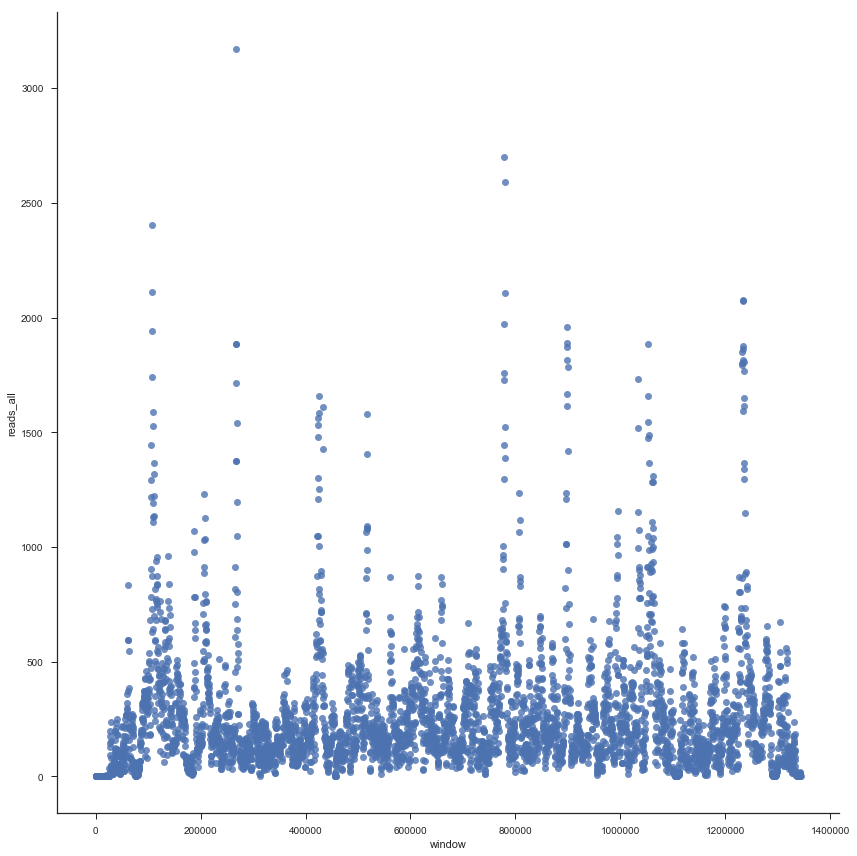

In [30]:
# sns.set_style("darkgrid")
%matplotlib inline


# sns.set_style('ticks')
# fig, ax = plt.subplots()
# # the size of A4 paper
# fig.set_size_inches(3, 7)
sns.lmplot(x="window", y="reads_all", data=chrom5_win, fit_reg=False, size=12)


plt.show()                                                                                      
                                                                                            

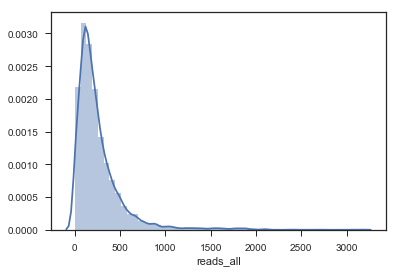

In [32]:
sns.distplot(chrom5_win["reads_all"])
plt.show() 